## Agenda
   
    ♦ Problem Description
    ♦ Data Understanding and exploration
    ♦ Split the data into Train and Validation sets
    ♦ Model Building
       - Logistic Regression
       - ROC curve to fix the threshold values
    ♦ Construct a confusion matrix
    ♦ Evaluation of the error metrics
    ♦ How do we implement Regularization techniques
    ♦ Build model using Naive Bayes classifier
    ♦ Compute Evaluation metrics
    ♦ Prinicpal Component Analysis
    

## Problem Description

A Regional Bank XYZ with 40000+ Customers would like to expand its business by predicting Customer's behavior to better sell cross products (eg: Selling Term Deposits to Retail Customers). The Bank has approached us to assess the same by providing access to their Customer campaign data. 

The data is related with direct marketing campaigns. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

Predict if an existing customer would subscribe to a Term Deposit

#### Attribute information:



Input variables:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                   "blue-collar","self-employed","retired","technician","services") 

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no") 

##### Related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

11 - duration: last contact duration, in seconds (numeric)

##### Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

##### Output variable (desired target):

16 - y - has the client subscribed a term deposit? (binary: "yes","no")

 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,recall_score,precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import GaussianNB 
%matplotlib inline

### Loading the data

In [2]:
df=pd.read_csv("Bank_Data.csv")

### Understanding the data

In [3]:
df.shape

(4521, 16)

In [4]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,no


In [6]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,apr,345,2,249,7,other,no


### Summary statistics

In [7]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [9]:
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

### Recode the levels of target on  data ; yes=1 and no=0


In [10]:
df['y'] = df['y'].apply(lambda x: 0 if x.strip()=='no' else 1)


In [11]:
cat_attr=df.select_dtypes(include ='object').columns 

df[cat_attr]= df[cat_attr].astype('category')

In [12]:
data = pd.get_dummies(columns=cat_attr, data = df, prefix=cat_attr, prefix_sep="_", drop_first=True)
data.head()

,age,balance,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,79,1,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789,220,1,339,4,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350,185,1,330,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,199,4,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,226,1,-1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


### Splitting the data into train and Validation sets

In [13]:
X = data.loc[:,data.columns.difference(['y'])]
y = data.y

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.3, random_state=124)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3164, 41)
(1357, 41)
(3164,)
(1357,)


### Standardizing the numeric attributes in the train and test data

In [15]:
scaler = MinMaxScaler()
X_train[['age','balance','duration','pdays','previous','campaign']] = scaler.fit_transform(X_train[['age','balance','duration','pdays','previous','campaign']])
X_test[['age','balance','duration','pdays','previous','campaign']]=scaler.transform(X_test[['age','balance','duration','pdays','previous','campaign']])

/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/share/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

### Model Building

### Logistic Regression

In [16]:
logistic_model = LogisticRegression(penalty='none')

logistic_model.fit(X_train,y_train)

LogisticRegression(penalty='none')

### Generating predictions

In [17]:
train_preds = logistic_model.predict(X_train)
train_preds_prob=logistic_model.predict_proba(X_train)[:,1]
test_preds = logistic_model.predict(X_test)
test_preds_prob=logistic_model.predict_proba(X_test)[:,1]

In [18]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
logistic_model.coef_

array([[-0.04616698, -0.98439218, -2.24756065, -0.01367156, -1.36277799,
         0.12835769, 12.73927104, -0.1210013 ,  0.1535139 , -0.46617985,
        -0.29161114, -0.65030276, -0.05792481, -0.41919625, -0.34315   ,
         0.366319  , -0.57105543, -0.48281996,  0.25174758, -0.33037713,
        -0.79949618,  0.39043802, -0.91653341, -0.56060561, -0.2790603 ,
        -0.16030565,  1.00721488,  0.17213091, -0.57007426, -0.45608453,
         0.68040562,  1.60570669, -0.37814329, -0.83600455,  1.36883075,
         1.0189887 , -0.06130949,  0.229165  ,  2.31721165, -0.28675908,
        -0.05293464]])

### Confusion Matrix

In [20]:
confusion_matrix(y_train,train_preds)

array([[2736,   63],
       [ 236,  129]])

In [21]:
train_accuracy_1= accuracy_score(y_train,train_preds)
train_recall_1= recall_score(y_train,train_preds)
train_precision_1= precision_score(y_train,train_preds)

test_accuracy_1= accuracy_score(y_test,test_preds)
test_recall_1= recall_score(y_test,test_preds)
test_precision_1= precision_score(y_test,test_preds)
print("************************************************")

print("Train Accuracy:",train_accuracy_1)
print('Train Recall:',train_recall_1)
print("Train Precision",train_precision_1)
print("************************************************")
print("Test Accuracy:",test_accuracy_1)
print("Test Recall:",test_recall_1)
print('Test Precision:',test_precision_1)

************************************************
Train Accuracy: 0.9054993678887484
Train Recall: 0.35342465753424657
Train Precision 0.671875
************************************************
Test Accuracy: 0.9005158437730287
Test Recall: 0.33974358974358976
Test Precision: 0.6235294117647059


In [22]:
#Classification report
print(classification_report(y_train,train_preds))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2799
           1       0.67      0.35      0.46       365

    accuracy                           0.91      3164
   macro avg       0.80      0.67      0.71      3164
weighted avg       0.89      0.91      0.89      3164



In [23]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1201
           1       0.62      0.34      0.44       156

    accuracy                           0.90      1357
   macro avg       0.77      0.66      0.69      1357
weighted avg       0.89      0.90      0.89      1357



In [24]:
model_performance = pd.DataFrame(np.array(['Logistic - All',train_accuracy_1,train_recall_1,train_precision_1,
                                           test_accuracy_1,test_recall_1,test_precision_1]).reshape(1,7))

model_performance.columns = ['Model','Train Accuracy','Train Recall','Train Precision',
                             'Test Accuracy','Test Recall','Test Precision']

In [25]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Test Accuracy,Test Recall,Test Precision
0,Logistic - All,0.9054993678887484,0.35342465753424657,0.671875,0.9005158437730287,0.33974358974358976,0.6235294117647059


### PCA

In [26]:
data1=df.copy()

In [27]:
data1.shape

(4521, 16)

In [28]:
numeric_var= df[['age','balance','duration','pdays','previous','campaign']]


In [29]:
numeric_std = StandardScaler().fit_transform(numeric_var)

In [30]:
numeric_std[:5]

array([[-1.05626965,  0.12107186, -0.7118608 , -0.4072183 , -0.32041282,
        -0.57682947],
       [-0.77258281,  1.1186443 , -0.16919389,  2.98904408,  2.04173372,
        -0.57682947],
       [-0.58345826, -0.02414438, -0.30389844,  2.89914302,  0.27012381,
        -0.57682947],
       [-1.05626965,  0.01772575, -0.25001662, -0.4072183 , -0.32041282,
         0.38796743],
       [ 1.68603644, -0.47275291, -0.14610168, -0.4072183 , -0.32041282,
        -0.57682947]])

In [31]:
numeric_std_df = pd.DataFrame(numeric_std)

In [32]:
numeric_std_df.describe()

,0,1,2,3,4,5
count,4.521000e+03,4.521000e+03,4.521000e+03,4.521000e+03,4.521000e+03,4.521000e+03
mean,-1.352355e-16,4.428552e-17,-4.670746e-17,2.864331e-16,1.938040e-16,2.915778e-16
std,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00
min,-2.096455e+00,-1.573671e+00,-1.000513e+00,-4.072183e-01,-3.204128e-01,-5.768295e-01
25%,-7.725828e-01,-4.498240e-01,-6.156433e-01,-4.072183e-01,-3.204128e-01,-5.768295e-01
50%,-2.052091e-01,-3.252105e-01,-3.038984e-01,-4.072183e-01,-3.204128e-01,-2.552305e-01
75%,7.404137e-01,1.905496e-02,2.503146e-01,-4.072183e-01,-3.204128e-01,6.636847e-02
max,4.333780e+00,2.318321e+01,1.062641e+01,8.303196e+00,1.444300e+01,1.518152e+01


In [33]:
pca = PCA()

In [34]:
principalComponents = pca.fit_transform(numeric_std_df)

In [35]:
pca.explained_variance_ratio_

array([0.26701668, 0.18097711, 0.17538448, 0.15441109, 0.15196022,
       0.07025043])

In [36]:
np.cumsum(pca.explained_variance_ratio_[:4])

array([0.26701668, 0.44799379, 0.62337827, 0.77778936])

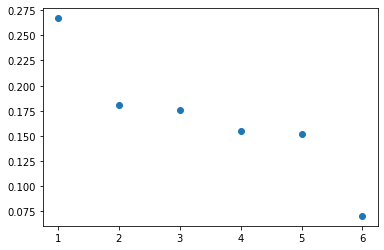

In [37]:
%matplotlib inline
y=list(pca.explained_variance_ratio_)
x=list(range(1,7))

plt.scatter(x,y)

plt.show()

In [38]:
principalComponents

array([[-0.41874949, -0.53097614,  0.23059209, -1.27919242,  0.28774252,
         0.09351262],
       [ 3.63802843,  0.22101692,  0.39371422, -0.67618524,  0.97869858,
        -0.6771127 ],
       [ 2.29581574, -0.43385941,  0.30435739, -0.56349109,  0.02460419,
        -1.83693364],
       ...,
       [-1.05958243,  0.93774088,  1.69895078,  2.16548108, -0.47508146,
        -0.01773945],
       [ 2.09184402, -0.84348978,  1.19592326, -0.21365125,  0.64302187,
        -0.18791667],
       [ 4.14388851,  0.03671612,  0.27681218,  0.64814202, -0.12242579,
         1.21164083]])

### Taking few PCA Components

In [39]:
principalDf = pd.DataFrame(data = principalComponents[:,0:5]
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3','principal component 4','principal component 5'])

In [40]:
principalDf.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-0.418749,-0.530976,0.230592,-1.279192,0.287743
1,3.638028,0.221017,0.393714,-0.676185,0.978699
2,2.295816,-0.433859,0.304357,-0.563491,0.024604
3,-0.583485,-0.653388,0.507362,-0.338373,0.674543
4,-0.432604,0.843090,-0.573701,0.231756,-1.549323


### Preparing the data for model building 

In [41]:
Data_for_model = pd.concat([principalDf,df['y']], axis=1)
print(Data_for_model.head(5))

   principal component 1  principal component 2  principal component 3  \
0              -0.418749              -0.530976               0.230592   
1               3.638028               0.221017               0.393714   
2               2.295816              -0.433859               0.304357   
3              -0.583485              -0.653388               0.507362   
4              -0.432604               0.843090              -0.573701   

   principal component 4  principal component 5  y  
0              -1.279192               0.287743  0  
1              -0.676185               0.978699  0  
2              -0.563491               0.024604  0  
3              -0.338373               0.674543  0  
4               0.231756              -1.549323  0  


In [42]:
x# Divide in to train and test
y1=Data_for_model["y"]
X1=Data_for_model.drop(['y'], axis=1)

#from sklearn.model_selection import train_test_split  
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20) 

In [43]:
dt = LogisticRegression(penalty='none')
model_pca = dt.fit(X1_train,y1_train)

In [44]:
pred_train = model_pca.predict(X1_train)
pred_test = model_pca.predict(X1_test)

In [45]:
pred_train[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
y1_train[:10]

683     0
3956    1
3937    0
2729    0
1990    0
4218    0
4286    0
1470    0
527     0
2044    0
Name: y, dtype: int64

In [47]:
train_accuracy_pca= accuracy_score(y1_train,pred_train)
train_recall_pca= recall_score(y1_train,pred_train)
train_precision_pca= precision_score(y1_train,pred_train)

test_accuracy_pca= accuracy_score(y1_test,pred_test)
test_recall_pca= recall_score(y1_test,pred_test)
test_precision_pca= precision_score(y1_test,pred_test)
print("************************************************")

print("Train Accuracy:",train_accuracy_pca)
print('Train Recall:',train_recall_pca)
print("Train Precision",train_precision_pca)
print("************************************************")
print("Test Accuracy:",test_accuracy_pca)
print("Test Recall:",test_recall_pca)
print('Test Precision:',test_precision_pca)


************************************************
Train Accuracy: 0.891316371681416
Train Recall: 0.14285714285714285
Train Precision 0.5277777777777778
************************************************
Test Accuracy: 0.8751381215469614
Test Recall: 0.1557377049180328
Test Precision: 0.6551724137931034


In [48]:
confusion_matrix(y_pred=pred_train,y_true=y1_train)

array([[3166,   51],
       [ 342,   57]])

In [49]:
confusion_matrix(y_pred=pred_test,y_true=y1_test)

array([[773,  10],
       [103,  19]])

In [50]:
d= np.array(['Logistic - PCA',train_accuracy_pca,train_recall_pca,train_precision_pca,
                                           test_accuracy_pca,test_recall_pca,test_precision_pca]).reshape(1,7)
model_performance = model_performance.append(pd.DataFrame(d,columns=model_performance.columns))

In [51]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Test Accuracy,Test Recall,Test Precision
0,Logistic - All,0.9054993678887484,0.35342465753424657,0.671875,0.9005158437730287,0.33974358974358976,0.6235294117647059
0,Logistic - PCA,0.891316371681416,0.14285714285714285,0.5277777777777778,0.8751381215469614,0.1557377049180328,0.6551724137931034


### Naive Bayes Classifier

In [52]:
model = GaussianNB().fit(X_train,y_train) 

nb_pred_train = model.predict(X_train)  
nb_pred_test = model.predict(X_test) #predict on test data 



In [53]:
nb_pred_train[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [54]:
confusion_matrix(y_train,nb_pred_train)
confusion_matrix(y_test,nb_pred_test)

array([[1073,  128],
       [  89,   67]])

In [55]:
train_accuracy_nb= accuracy_score(y_train,nb_pred_train)
train_recall_nb= recall_score(y_train,nb_pred_train)
train_precision_nb= precision_score(y_train,nb_pred_train)

test_accuracy_nb= accuracy_score(y_test,nb_pred_test)
test_recall_nb= recall_score(y_test,nb_pred_test)
test_precision_nb= precision_score(y_test,nb_pred_test)
print("************************************************")

print("Train Accuracy:",train_accuracy_nb)
print('Train Recall:',train_recall_nb)
print("Train Precision",train_precision_nb)
print("************************************************")
print("Test Accuracy:",test_accuracy_nb)
print("Test Recall:",test_recall_nb)
print('Test Precision:',test_precision_nb)


************************************************
Train Accuracy: 0.8460809102402023
Train Recall: 0.4520547945205479
Train Precision 0.36504424778761063
************************************************
Test Accuracy: 0.8400884303610906
Test Recall: 0.42948717948717946
Test Precision: 0.3435897435897436


In [56]:
nb_per = np.array(['Naive Bayes',train_accuracy_nb,train_recall_nb,train_precision_nb,
                                           test_accuracy_nb,test_recall_nb,test_precision_nb]).reshape(1,7)
model_performance = model_performance.append(pd.DataFrame(nb_per,columns=model_performance.columns))

In [57]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Test Accuracy,Test Recall,Test Precision
0,Logistic - All,0.9054993678887484,0.35342465753424657,0.671875,0.9005158437730287,0.33974358974358976,0.6235294117647059
0,Logistic - PCA,0.891316371681416,0.14285714285714285,0.5277777777777778,0.8751381215469614,0.1557377049180328,0.6551724137931034
0,Naive Bayes,0.8460809102402023,0.4520547945205479,0.36504424778761063,0.8400884303610906,0.42948717948717946,0.3435897435897436


### Balancing the class weights

In [58]:
logistic_model = LogisticRegression(penalty='none', class_weight='balanced')

logistic_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', penalty='none')

In [59]:
train_preds = logistic_model.predict(X_train)
train_preds_prob=logistic_model.predict_proba(X_train)[:,1]
test_preds = logistic_model.predict(X_test)
test_preds_prob=logistic_model.predict_proba(X_test)[:,1]

In [60]:
logistic_model.coef_

array([[-0.05719799, -1.06264899, -5.03299097,  0.20300292, -1.43736719,
        -0.05157765, 18.2005446 , -0.03471908,  0.09623874, -0.32352028,
        -0.3076054 , -0.99091598, -0.22284328, -0.38091643, -0.4337043 ,
         0.36264376, -0.74533019, -0.68609111,  0.27885421, -0.40812272,
        -0.77432952,  0.47738309, -1.15927731, -0.43651199, -0.13080549,
        -0.37814648,  0.70945389,  0.13410151, -0.94370412, -0.96423583,
         0.48298592,  1.73356467, -0.8611226 , -0.7828551 ,  1.53783966,
         1.16969864,  0.10283376,  0.26856753,  2.4109556 , -0.45540589,
        -0.26988001]])

In [61]:
confusion_matrix(y_train,train_preds)

array([[2370,  429],
       [  64,  301]])

In [62]:
train_accuracy_imbalance= accuracy_score(y_train,train_preds)
train_recall_imbalance= recall_score(y_train,train_preds)
train_precision_imbalance= precision_score(y_train,train_preds)

test_accuracy_imbalance= accuracy_score(y_test,test_preds)
test_recall_imbalance= recall_score(y_test,test_preds)
test_precision_imbalance= precision_score(y_test,test_preds)
print("************************************************")

print("Train Accuracy:",train_accuracy_imbalance)
print('Train Recall:',train_recall_imbalance)
print("Train Precision",train_precision_imbalance)
print("************************************************")
print("Test Accuracy:",test_accuracy_imbalance)
print("Test Recall:",test_recall_imbalance)
print('Test Precision:',test_precision_imbalance)


************************************************
Train Accuracy: 0.8441845764854614
Train Recall: 0.8246575342465754
Train Precision 0.4123287671232877
************************************************
Test Accuracy: 0.8282977155490051
Test Recall: 0.8012820512820513
Test Precision: 0.382262996941896


In [63]:
print(classification_report(y_train,train_preds))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2799
           1       0.41      0.82      0.55       365

    accuracy                           0.84      3164
   macro avg       0.69      0.84      0.73      3164
weighted avg       0.91      0.84      0.86      3164



In [64]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1201
           1       0.38      0.80      0.52       156

    accuracy                           0.83      1357
   macro avg       0.68      0.82      0.71      1357
weighted avg       0.90      0.83      0.85      1357



In [65]:
imbalance_per = np.array(['Logistic - imbalance',train_accuracy_imbalance,train_recall_imbalance,
                          train_precision_imbalance,
                                           test_accuracy_imbalance,test_recall_imbalance,
                          test_precision_imbalance]).reshape(1,7)
model_performance = model_performance.append(pd.DataFrame(imbalance_per,columns=model_performance.columns))

In [66]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Test Accuracy,Test Recall,Test Precision
0,Logistic - All,0.9054993678887484,0.35342465753424657,0.671875,0.9005158437730287,0.33974358974358976,0.6235294117647059
0,Logistic - PCA,0.891316371681416,0.14285714285714285,0.5277777777777778,0.8751381215469614,0.1557377049180328,0.6551724137931034
0,Naive Bayes,0.8460809102402023,0.4520547945205479,0.36504424778761063,0.8400884303610906,0.42948717948717946,0.3435897435897436
0,Logistic - imbalance,0.8441845764854614,0.8246575342465754,0.4123287671232877,0.8282977155490051,0.8012820512820513,0.382262996941896
